**Logistic Regression on Titanic dataset**

**Sohini Mukherjee**

**30.03.2021**

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train =pd.read_csv('E:/2.PYTHON-ML-BOOTCAMP/resources/13-Logistic-Regression/titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Exploratory Data Analysis**

**Checking missing data**

In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

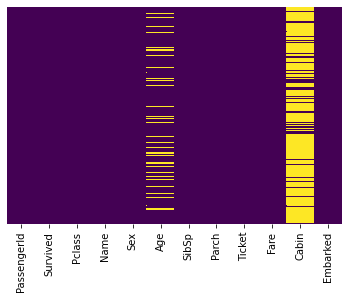

In [5]:
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

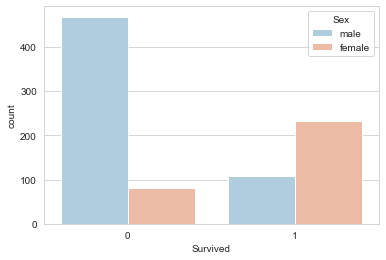

In [10]:
#for classsification problems its a good idea to see the ratio of target labels.
#checking who survived
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train,hue='Sex', palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

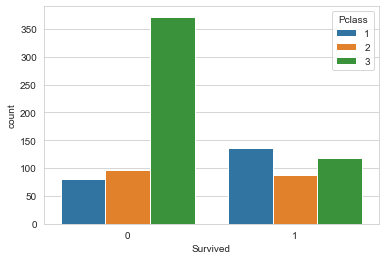

In [11]:
sns.countplot(x='Survived', data= train, hue='Pclass')

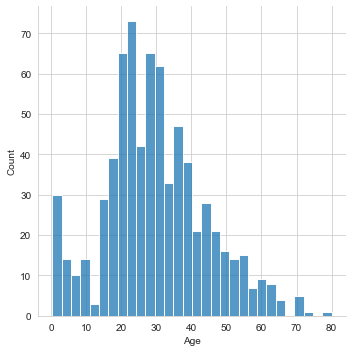

In [13]:
sns.displot(train['Age'].dropna(),bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

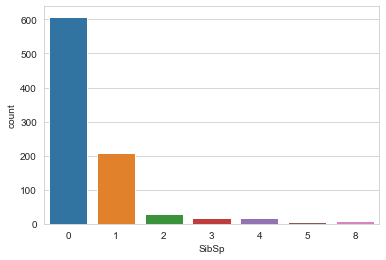

In [14]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

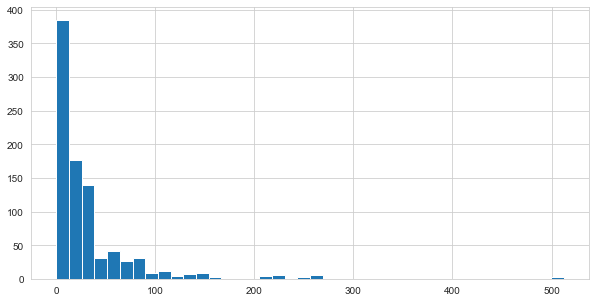

In [18]:
train['Fare'].hist(bins=40,figsize=(10,5))

In [19]:
import cufflinks as cf
cf.go_offline()

In [21]:
train['Fare'].iplot(kind='hist',bins=40)

**Cleaning Data**

**From the heatmap it is evident that Age and Cabin columns have a lot of missin data. It is not wise to drop the Age column altogether. So we will fill in the mmissing data.**

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

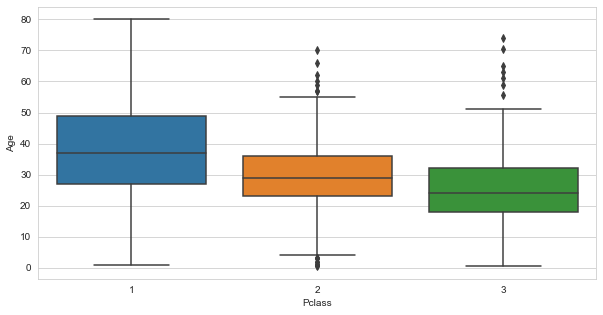

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass', y='Age', data=train)

**The people in the first class and second class are older than third class.**

In [30]:
means = train.groupby('Pclass')['Age'].mean()
means

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [32]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 25
    else:
        return age

In [33]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

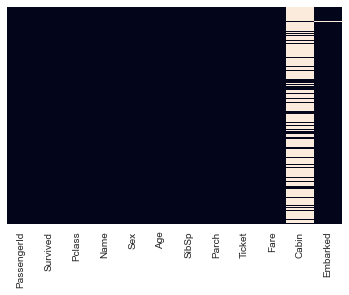

In [34]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

**Cabin column has too many missing values so we are going to drop it.**

In [35]:
train.drop('Cabin', axis= 1, inplace = True)

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

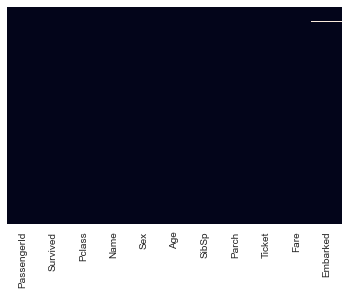

In [37]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

**Dropping any remaining missing values.**

In [38]:
train.dropna(inplace=True)

<AxesSubplot:>

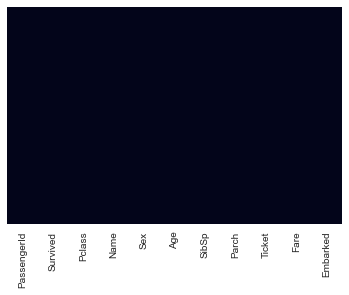

In [39]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

**Creating Dummy Variables for Sex and Embarked columns to apply Machine Learning**

In [42]:
sex = pd.get_dummies(train['Sex'], drop_first=True)  #using drop_first to avoid multicolinearity problems

In [43]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [44]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [45]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [46]:
train = pd.concat([train, sex, embark], axis=1)

In [47]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1,0,1


**Dropping columns that are not usable**

In [51]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

KeyError: "['Sex' 'Embarked' 'Name' 'Ticket'] not found in axis"

In [55]:
train.drop('PassengerId', axis=1, inplace=True)

In [56]:
train.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.25,1,0,1


**Machine Learning**

In [57]:
X= train.drop('Survived', axis=1)
y= train['Survived']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [62]:
from sklearn.linear_model import LogisticRegression

In [66]:
lg = LogisticRegression()

In [67]:
lg.fit(X_train, y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [68]:
predictions = lg.predict(X_test)

In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
confusion_matrix(y_test, predictions)

array([[149,  14],
       [ 31,  73]], dtype=int64)